In [1]:
import h3ppy
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from array import array
import sys
import pandas as pd
import scipy as scipy

import os
#os.environ['PYSYN_CDBS']  #need to figure out this environment variable eventually; see pysynphot stuff?
import pysynphot as S
from astropy.io import ascii

import io
from pathlib import Path
import math
from matplotlib.colors import LogNorm as lognorm
import scipy.integrate as integrate
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.stats import norm

C:\Users\kater00\anaconda3\lib\site-packages\pysynphot\locations.py:46: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
C:\Users\kater00\anaconda3\lib\site-packages\pysynphot\locations.py:345: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
C:\Users\kater00\anaconda3\lib\site-packages\pysynphot\refs.py:117: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for https://ssb.stsci.edu/trds\mtab\*_tmg.fits
  warnings.warn('No graph or component tables found; '
C:\Users\kater00\anaconda3\lib\site-packages\pysynphot\refs.py:124: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for https://ssb.stsci.edu/trds\mtab\*_tmt.fits
  warnings.warn('No thermal tables found, '


In [2]:
order = '1'

#flat
flatlist = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0008_flat.fits')
flat = fits.getdata(flatlist, ext=0)


#stars
starBlist1 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0084_star.fits')
starB1 = fits.getdata(starBlist1, ext=0)

starAlist1 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0085_star.fits')
starA1 = fits.getdata(starAlist1, ext=0)

starBlist2 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0086_star.fits')
starB2 = fits.getdata(starBlist2, ext=0)

starAlist2 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0087_star.fits')
starA2 = fits.getdata(starAlist2, ext=0)

starBlist3 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0088_star.fits')
starB3 = fits.getdata(starBlist3, ext=0)

starAlist3 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0089_star.fits')
starA3 = fits.getdata(starAlist3, ext=0)

starBlist4 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0090_star.fits')
starB4 = fits.getdata(starBlist4, ext=0)

starAlist4 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0091_star.fits')
starA4 = fits.getdata(starAlist4, ext=0)

wave_e1o1 = pd.read_csv(r'X:\obs_22\Keck_17Aug\spec\e1o1\star e1o1.dat',delim_whitespace=True,skiprows=2)

wave_micron1st = wave_e1o1["lambda"]
wave_ang1st = wave_e1o1["lambda"]*10000


wave_e1o4 = pd.read_csv(r'X:\obs_22\Keck_17Aug\spec\e1o4\star e1o4.dat',delim_whitespace=True,skiprows=2)

wave_micron4th = wave_e1o4["lambda"]
wave_ang4th = wave_e1o4["lambda"]*10000

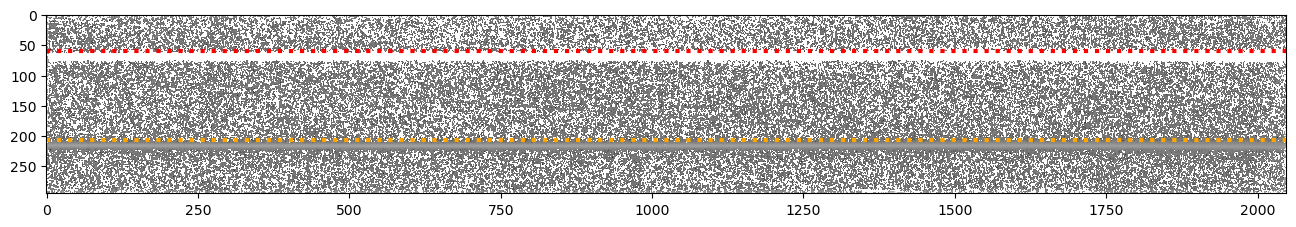

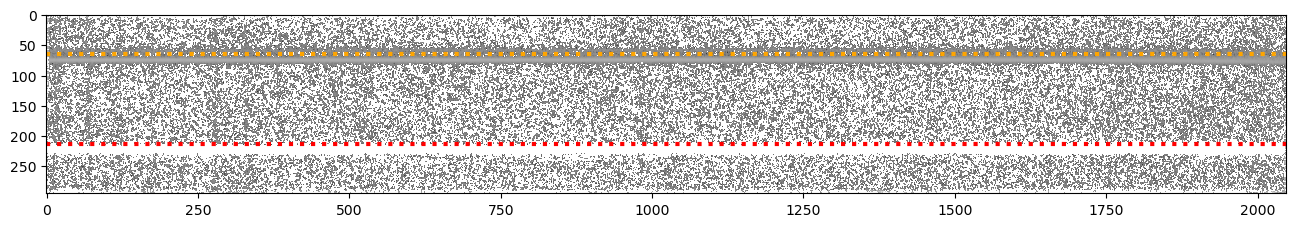

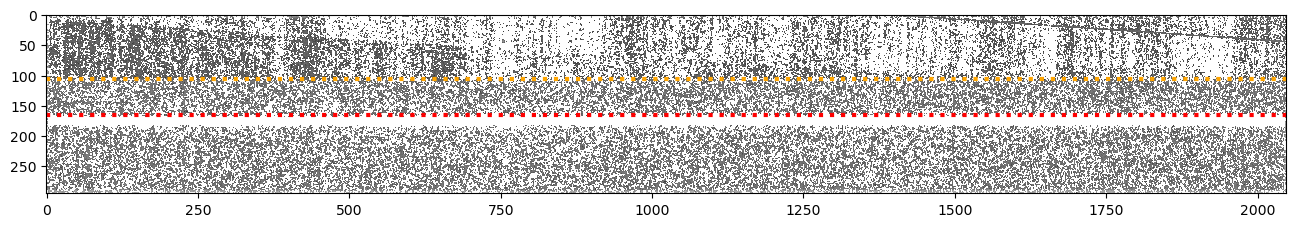

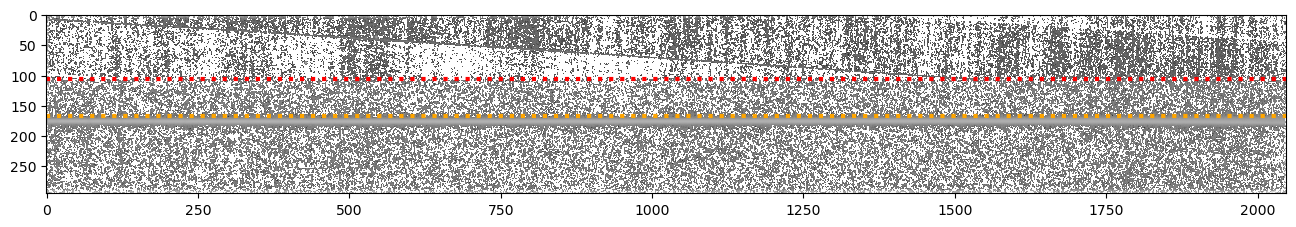

In [3]:
plt.figure(figsize=(16, 12))
plt.imshow(starA1/flat-starB1/flat, cmap='gray', norm = lognorm())
plt.axhline(y = np.sum(starA1[10:-10], axis = 1).argmax(), linestyle = ':',color = 'orange', linewidth = 3)
plt.axhline(y = np.sum(starB1[10:-10], axis = 1).argmax(), linestyle = ':',color = 'r', linewidth = 3)
plt.show()

plt.figure(figsize=(16, 12))
plt.imshow(starA2/flat-starB2/flat, cmap='gray', norm = lognorm())
plt.axhline(y = np.sum(starA2[10:-10], axis = 1).argmax(), linestyle = ':',color = 'orange', linewidth = 3)
plt.axhline(y = np.sum(starB2[10:-10], axis = 1).argmax(), linestyle = ':',color = 'r', linewidth = 3)
plt.show()

plt.figure(figsize=(16, 24))
plt.imshow(starA3/flat-starB3/flat, cmap='gray', norm = lognorm())
plt.axhline(y = np.sum(starA3[10:-10], axis = 1).argmax(), linestyle = ':',color = 'orange', linewidth = 3)
plt.axhline(y = np.sum(starB3[10:-10], axis = 1).argmax(), linestyle = ':',color = 'r', linewidth = 3)
plt.show()

plt.figure(figsize=(16, 16))
plt.imshow(starA4/flat-starB4/flat, cmap='gray', norm = lognorm())
plt.axhline(y = np.sum(starA4[10:-10], axis = 1).argmax(), linestyle = ':',color = 'orange', linewidth = 3)
plt.axhline(y = np.sum(starB4[10:-10], axis = 1).argmax(), linestyle = ':',color = 'r', linewidth = 3)
plt.show()

#star4 = starA1/flat-starB1/flat + starA2/flat-starB2/flat + starA3/flat-starB3/flat + starA4/flat-starB4/flat

#plt.figure(figsize=(16, 12))
#plt.imshow(star4, cmap='gnuplot2', norm = lognorm())
#plt.show()

In [4]:
#test = np.sum(starA1, axis=1)
starA1peak = np.sum(starA1[10:-10], axis = 1).argmax()
starB1peak = np.sum(starB1[10:-10], axis = 1).argmax()

starA2peak = np.sum(starA2[10:-10], axis = 1).argmax()
starB2peak = np.sum(starB2[10:-10], axis = 1).argmax()

starA3peak = np.sum(starA3[10:-10], axis = 1).argmax()
starB3peak = np.sum(starB3[10:-10], axis = 1).argmax()

starA4peak = np.sum(starA4[10:-10], axis = 1).argmax()
starB4peak = np.sum(starB4[10:-10], axis = 1).argmax()

print(starA1peak)
print(starB1peak)
print(starA2peak)
print(starB2peak)
print(starA3peak)
print(starB3peak)
print(starA4peak)
print(starB4peak)

207
60
65
213
106
166
167
106


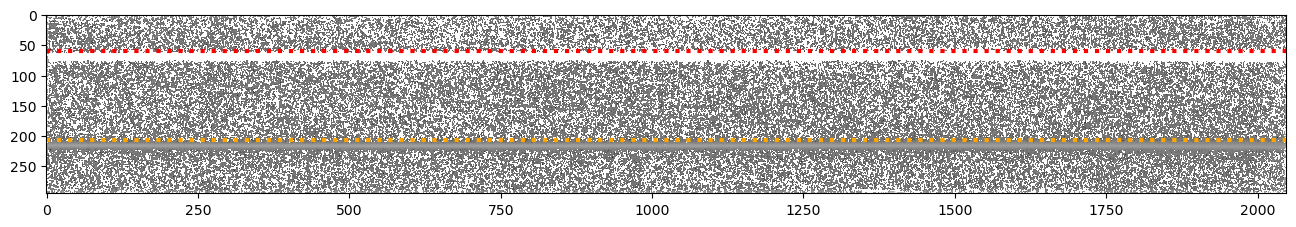

295

In [5]:
star1diff = starA1/flat-starB1/flat
star2diff = starA2/flat-starB2/flat


plt.figure(figsize=(16, 12))
plt.imshow(star1diff, cmap='gray', norm = lognorm())
plt.axhline(y = np.sum(starA1[10:-10], axis = 1).argmax(), linestyle = ':',color = 'orange', linewidth = 3)
plt.axhline(y = np.sum(starB1[10:-10], axis = 1).argmax(), linestyle = ':',color = 'r', linewidth = 3)
plt.show()




len(star1diff[:,2])
#star1diff[:,2]

217
70
75
223
116
176
177
116


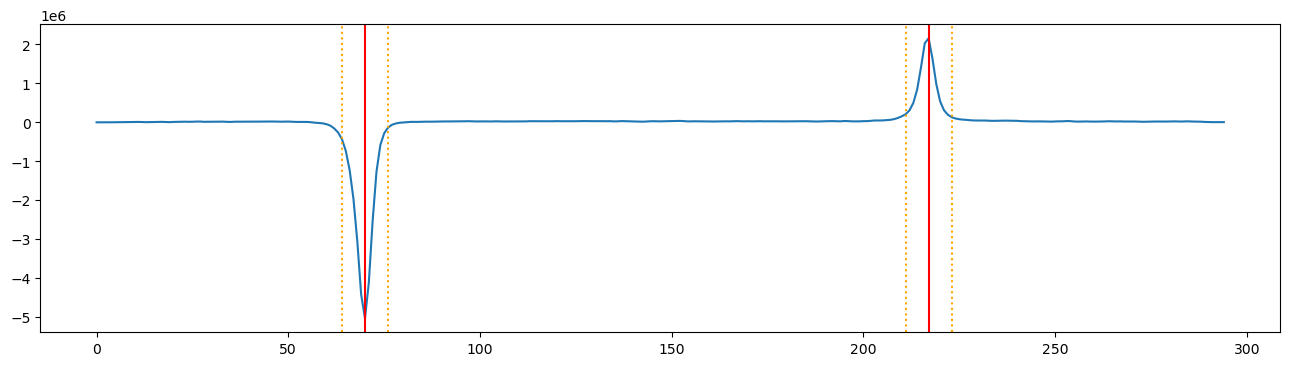

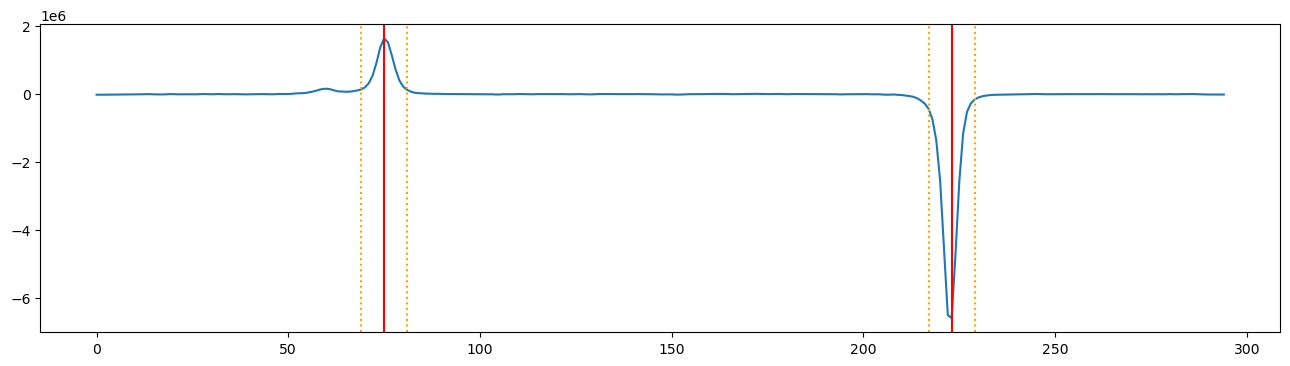

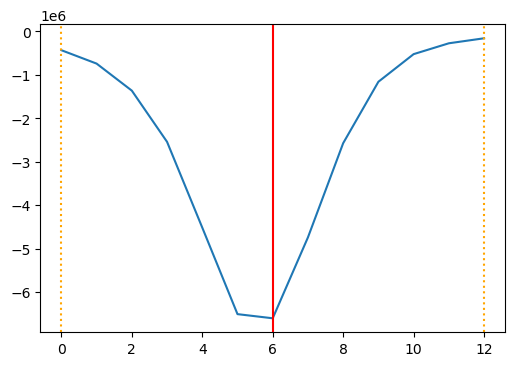

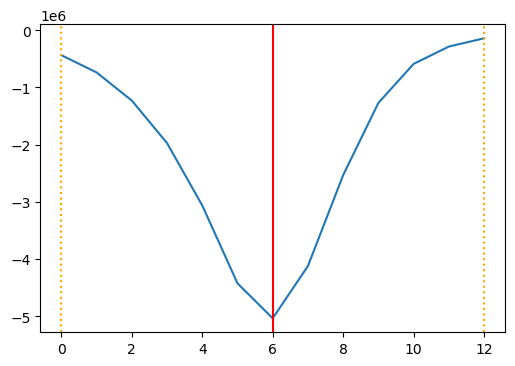

In [6]:
#need to define edges of the star for each frame (and A vs B)
#going to do a sum across all wavelengths to set a hard boundary by reducing noise
#test = np.sum(starA1, axis=1)
#test = np.sum(starA1, axis=1)
starA1peak = np.sum(starA1[10:-10], axis = 1).argmax() + 10
starB1peak = np.sum(starB1[10:-10], axis = 1).argmax() + 10

starA2peak = np.sum(starA2[10:-10], axis = 1).argmax() + 10
starB2peak = np.sum(starB2[10:-10], axis = 1).argmax() + 10

starA3peak = np.sum(starA3[10:-10], axis = 1).argmax() + 10
starB3peak = np.sum(starB3[10:-10], axis = 1).argmax() + 10

starA4peak = np.sum(starA4[10:-10], axis = 1).argmax() + 10
starB4peak = np.sum(starB4[10:-10], axis = 1).argmax() + 10

print(starA1peak)
print(starB1peak)
print(starA2peak)
print(starB2peak)
print(starA3peak)
print(starB3peak)
print(starA4peak)
print(starB4peak)




widthpeak = 6

starA1sum = np.sum(starA1, axis = 1)
starB1sum = np.sum(starB1, axis = 1)
starA2sum = np.sum(starA2, axis = 1)
starB2sum = np.sum(starB2, axis = 1)

AB1 = starA1sum - starB1sum
AB2 = starA2sum - starB2sum

plt.figure(figsize=(16, 4))
plt.plot(range(len(starA1sum)), AB1)
plt.axvline(x = starA1peak, color='r')
plt.axvline(x = starA1peak-widthpeak, color='orange', linestyle = ":")
plt.axvline(x = starA1peak+widthpeak, color='orange', linestyle = ":")

plt.axvline(x = starB1peak, color='r')
plt.axvline(x = starB1peak-widthpeak, color='orange', linestyle = ":")
plt.axvline(x = starB1peak+widthpeak, color='orange', linestyle = ":")
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(range(len(starA2sum)), AB2)
plt.axvline(x = starA2peak, color='r')
plt.axvline(x = starA2peak-widthpeak, color='orange', linestyle = ":")
plt.axvline(x = starA2peak+widthpeak, color='orange', linestyle = ":")

plt.axvline(x = starB2peak, color='r')
plt.axvline(x = starB2peak-widthpeak, color='orange', linestyle = ":")
plt.axvline(x = starB2peak+widthpeak, color='orange', linestyle = ":")
plt.show()


plt.figure(figsize=(6, 4))
plt.plot(range(len(AB2[starB2peak-widthpeak:starB2peak+widthpeak+1])),  AB2[starB2peak-widthpeak:starB2peak+widthpeak+1])
plt.axvline(x = int(len(AB2[starB2peak-widthpeak:starB2peak+widthpeak])/2), color='r')

plt.axvline(x = int(len(AB2[starB2peak-widthpeak:starB2peak+widthpeak])/2 + widthpeak), color='orange', linestyle = ":")
plt.axvline(x = int(len(AB2[starB2peak-widthpeak:starB2peak+widthpeak])/2 - widthpeak), color='orange', linestyle = ":")

plt.show()

plt.figure(figsize=(6, 4))
plt.plot(range(len(AB1[starB1peak-widthpeak:starB1peak+widthpeak+1])),  AB1[starB1peak-widthpeak:starB1peak+widthpeak+1])
plt.axvline(x = int(len(AB1[starB1peak-widthpeak:starB1peak+widthpeak])/2), color='r')

plt.axvline(x = int(len(AB1[starB1peak-widthpeak:starB1peak+widthpeak])/2 + widthpeak), color='orange', linestyle = ":")
plt.axvline(x = int(len(AB1[starB1peak-widthpeak:starB1peak+widthpeak])/2 - widthpeak), color='orange', linestyle = ":")

plt.show()



#from this looks like a width of 6 is good, so 12 points in total to capture the width of the peak

In [7]:
#now going through an treating each column individually (each column is its own wavelength value)

In [127]:
(star1diff[30:-45,waveval]).argmax() + 30

229

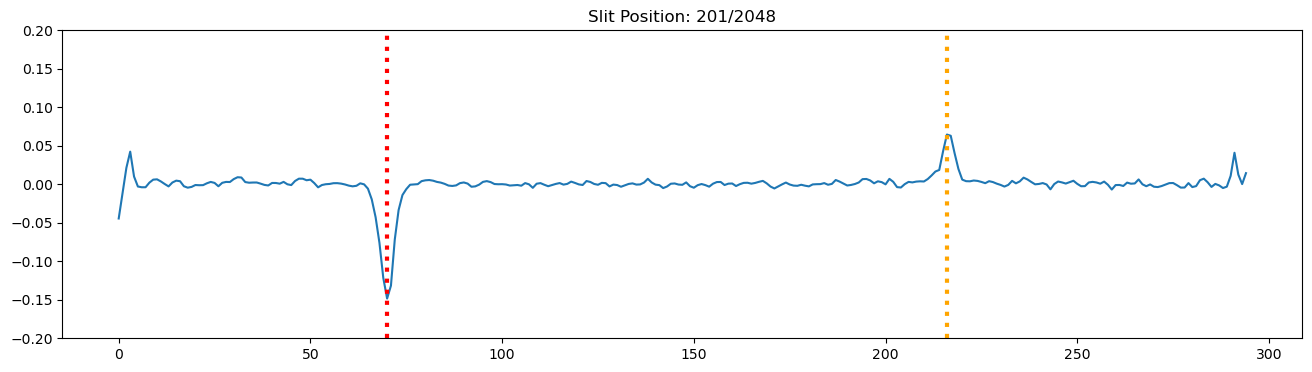

In [236]:
#specific to the 1st AB nod
#4 through -3 (inclusive)

waveval = 200


plt.figure(figsize=(16, 4))
plt.plot(range(len(star1diff[:,waveval])), star1diff[:,waveval])
plt.axvline(x = (star1diff[150:-66,waveval]).argmax() + 150, linestyle = ':',color = 'orange', linewidth = 3)
plt.axvline(x = (star1diff[30:100,waveval]).argmin() + 30, linestyle = ':',color = 'r', linewidth = 3)

if waveval>=0:
    plt.title("Slit Position: " + str(waveval + 1) + "/" + str(len(star1diff[0])))
else:
    plt.title("Slit Position: " + str(waveval + len(star1diff[0]) + 1) + "/" + str(len(star1diff[0])))
    
plt.ylim(-0.2, 0.2)
plt.show()

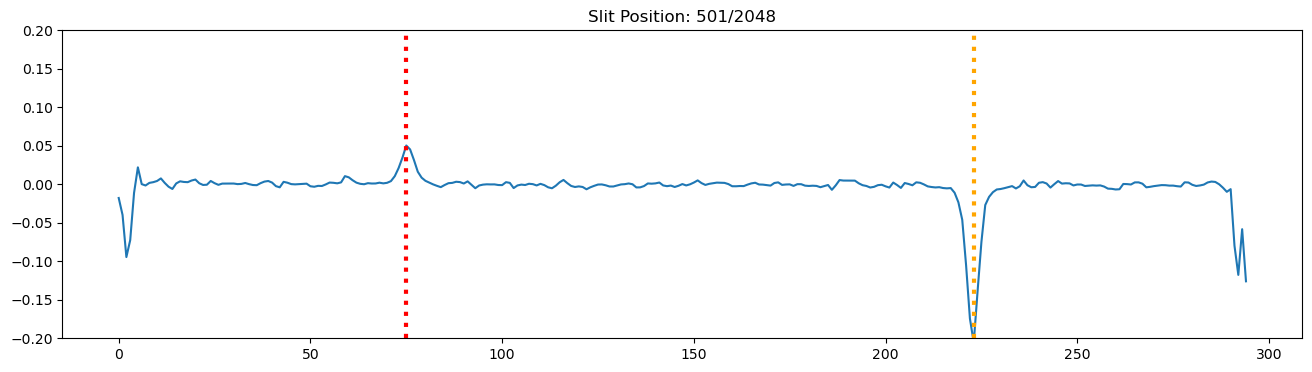

In [241]:
#specific to the 2nd AP nod
#4 through -3 (inclusive)

waveval = 500


plt.figure(figsize=(16, 4))
plt.plot(range(len(star2diff[:,waveval])), star2diff[:,waveval])
plt.axvline(x = (star2diff[150:-66,waveval]).argmin() + 150, linestyle = ':',color = 'orange', linewidth = 3)
plt.axvline(x = (star2diff[30:100,waveval]).argmax() + 30, linestyle = ':',color = 'r', linewidth = 3)

if waveval>=0:
    plt.title("Slit Position: " + str(waveval + 1) + "/" + str(len(star1diff[0])))
else:
    plt.title("Slit Position: " + str(waveval + len(star1diff[0]) + 1) + "/" + str(len(star1diff[0])))
    
plt.ylim(-0.2, 0.2)
plt.show()

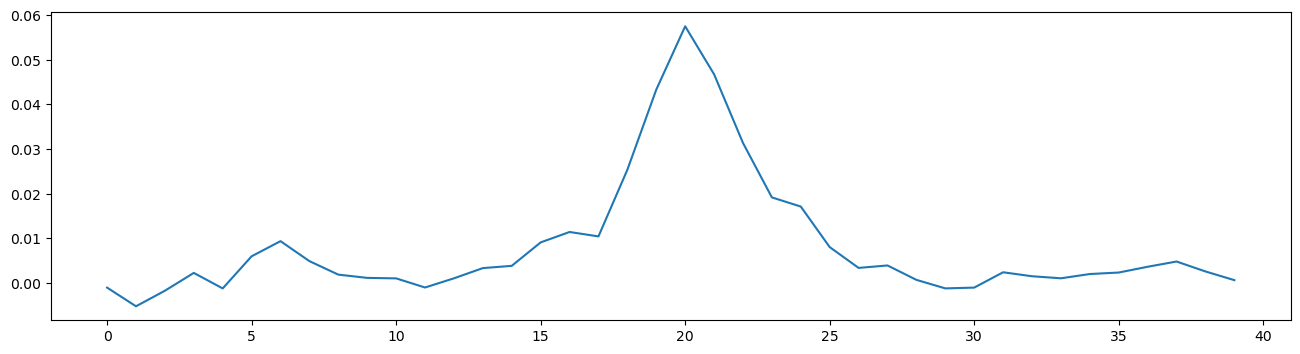

In [140]:
plt.figure(figsize=(16, 4))
Amax = (star1diff[30:-66,20]).argmax()+30
Amaxlow = Amax-20
Amaxhigh = Amax+20
peakA = star1diff[Amaxlow:Amaxhigh, 20]

plt.plot(range(len(peakA)), peakA)
plt.show()

In [169]:
#function to pull out just the peaks of stars in a single A-B data frame
#stardiff: an A-B frame (so the max and min values within some range vertically
                                #should correspond to an A and B respectfully)
#width: the width of the peak (adds to each side of max/min) - 20 should be fine
                        #want some extra room to play with for gaussian fit

def pullstarpeaks(stardiff, width=20):
    
    Alist = []
    Blist = []
    for i in range(len(stardiff[0])):
        
        #for "front" half of star photons: determining whether inputted data has max or min (A or B) in first half
        if np.average(stardiff[30:100, i]) > 0: 
            Amax = (stardiff[30:100,i]).argmax()+30
            #30 and 45 are arbitrailarily picked values which lie outside of noise/star positions
            #need to add 30 to offset the inital change in where index is being searched
        elif np.average(stardiff[30:100, i]) < 0: 
            Bmin = (stardiff[30:100,i]).argmin()+30 #see above
        
        
        #for "back" half of star photons: determining whether inputted data has max or min (A or B) in 2nd half
        if np.average(stardiff[150:-66, i]) > 0: 
            Amax = (stardiff[150:-66,i]).argmax()+150
            #30 and 45 are arbitrailarily picked values which lie outside of noise/star positions
            #need to add 30 to offset the inital change in where index is being searched
        elif np.average(stardiff[150:100, i]) < 0: 
            Bmin = (stardiff[150:100,i]).argmin()+150 #see above
            
        
        Amaxlow = Amax-width
        Amaxhigh = Amax+width
        peakA = stardiff[Amaxlow:Amaxhigh, i]
        Alist.append(peakA)
        
        Bmin = (stardiff[30:-45,i]).argmin()+30 #see above
        Bminlow = Bmin-width
        Bminhigh = Bmin+width
        peakB = stardiff[Bminlow:Bminhigh, i]
        Blist.append(peakB)
        
    return np.asarray(Alist),np.asarray(Blist)
        

In [171]:
allpeaks = pullstarpeaks(star1diff)
Apeaks = allpeaks[0]
Bpeaks = allpeaks[1]

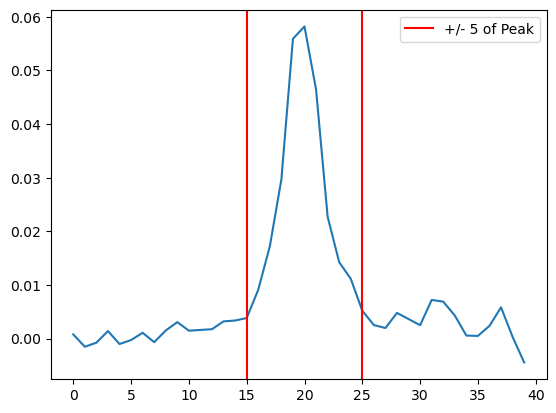

In [172]:
width = 20
wavepos = 1000


#plt.figure(figsize=(6, 4))
plt.plot(range(len(Bpeaks[wavepos])), Apeaks[wavepos])
plt.axvline(x = width-5, label = "+/- 5 of Peak", color = 'r')
plt.axvline(x = width + 5, color = 'r')
plt.legend()

In [173]:
len(Apeaks[10])/2

20.0

amplitude = 0.21656865701456515 +/- 0.03717473770551072
center = 19.623597294768444 +/- 0.47602785169829465
sigma = 2.401734093352994 +/- 0.4760278544579329


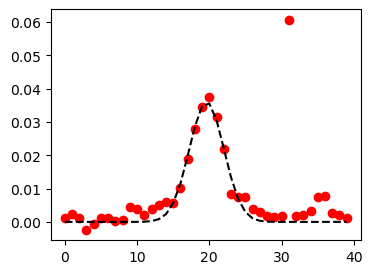

In [174]:
wavepos = 1915

x_array = range(len(Apeaks[wavepos]))
y_array_gauss = Apeaks[wavepos]


def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))

amp1 = Bpeaks[10,width]
cen1 = len(Bpeaks[10])/2
sigma1 = 2

popt_gauss, pcov_gauss = scipy.optimize.curve_fit(_1gaussian, x_array, y_array_gauss, p0=[amp1, cen1, sigma1])
perr_gauss = np.sqrt(np.diag(pcov_gauss))

# this cell prints the fitting parameters with their errors
print ("amplitude = " + str(popt_gauss[0])+ " +/- "+ str( perr_gauss[0]))
print ("center = " + str(popt_gauss[1])+ " +/- "+ str( perr_gauss[1]))
print ("sigma = " + str(popt_gauss[2])+ " +/- "+ str( perr_gauss[2]))


plt.figure(figsize=(4,3))

plt.plot(x_array, y_array_gauss, "ro")
plt.plot(x_array, _1gaussian(x_array, *popt_gauss), 'k--')#,\
plt.show()

In [175]:
def gaussianfitall(y):
    fits   = []
    result = []
    uncert = []
    
    
    for i in range(len(y)):
        
        if np.average(y[i]) > 0:
            amp = np.max(y[i])
        elif np.average(y[i]) < 0:
            amp = np.min(y[i])
        else:
            sys.exit("Unclear whether A or B")

        cen = len(y[i])/2
        sigma = 2
        x = range(len(y[i]))
        
        popt_gauss, pcov_gauss = scipy.optimize.curve_fit(_1gaussian, x, y[i], p0=[amp, cen, sigma])
        fits.append(_1gaussian(x_array, *popt_gauss))
        
        perr_gauss = np.sqrt(np.diag(pcov_gauss))
        result.append(popt_gauss)
        uncert.append(perr_gauss)
        
    return fits,result,uncert

In [176]:
Afits = gaussianfitall(Apeaks)
Bfits = gaussianfitall(Bpeaks)

Afit = Afits[0]
Bfit = Bfits[0]

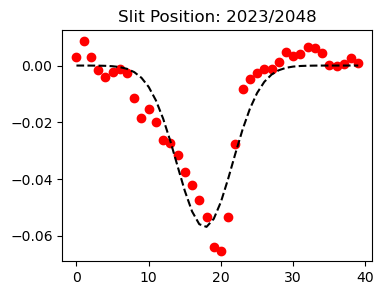

In [229]:
#Bad A fits: 0,1,3,520,1022,1097,2046,2047
#Bad B fits: 1,2,2022,2043,2046,2047

wavepos = 2022
plt.figure(figsize=(4,3))

x_array = range(len(Bpeaks[wavepos]))
y_array_gauss = Bpeaks[wavepos]

plt.plot(x_array, y_array_gauss, "ro")
plt.plot(x_array, Bfit[wavepos], 'k--')
plt.title("Slit Position: " + str(wavepos +1) + "/" + str(len(star1diff[0])))
plt.show()

In [221]:
#now to integrate area under the curve
wavepos = 1000

fit = Bfit
data = Bpeaks

if np.average(fit[1]) > 0:
    peakindexgauss = (fit[wavepos]).argmax()
    print(peakindexgauss)
    peakindexdata = (data[wavepos]).argmax()
    print(peakindexdata)
elif np.average(fit[1]) < 0:
    peakindexgauss = (fit[wavepos]).argmin()
    print(peakindexgauss)
    peakindexdata = (data[wavepos]).argmin()
    print(peakindexdata)
else:
    print("error")

areagauss = np.abs(sum(fit[wavepos][peakindexgauss-6:peakindexgauss+6]))
areadata = np.abs(sum(data[wavepos, peakindex-6:peakindex+6]))
print("Area calculated from Gaussian Fit: " + str(round(areagauss,4)))
print("Area calculated from Data: " + str(round(areadata, 4)))

percentdiff = np.absolute(areagauss - areadata)/areadata*100
print("Percentage Difference: " + str(round(percentdiff, 2)) + "%")

19
20
Area calculated from Gaussian Fit: 0.657
Area calculated from Data: 0.669
Percentage Difference: 1.79%


In [222]:
def areaundercurve(fit, data, width):
    area = []
    
    for i in range(len(fit)):
        if np.average(fit[1]) > 0:
            peakindexgauss = (fit[i]).argmax()
            peakindexdata = (data[i]).argmax()
        elif np.average(fit[1]) < 0:
            peakindexgauss = (fit[i]).argmin()
            peakindexdata = (data[i]).argmin()
            
        else:
            sys.exit("Unclear whether A or B")
                   
        areagauss = np.abs(sum(fit[i][peakindexgauss-width:peakindexgauss+width]))
        areadata = np.abs(sum(data[i, peakindex-width:peakindex+width]))
        
        diff = np.abs(areagauss - areadata)/areadata
        if diff > 0.1:
            print("Index of bad fit: " + str(i) + ", error = " + str(round(diff*100, 2)))
        
        area.append(areagauss)
                   
    return area
    

In [223]:
Aarea = areaundercurve(Afit,Apeaks,6)

Index of bad fit: 0, error = 31.26
Index of bad fit: 1, error = 119.13
Index of bad fit: 520, error = 12.1
Index of bad fit: 1022, error = 16.21
Index of bad fit: 1097, error = 15.83
Index of bad fit: 2046, error = 22.58
Index of bad fit: 2047, error = 236.2


In [224]:
Barea = areaundercurve(Bfit,Bpeaks,6)

Index of bad fit: 1, error = 28.04
Index of bad fit: 2, error = 35.51
Index of bad fit: 2022, error = 10.8
Index of bad fit: 2043, error = 14.93
Index of bad fit: 2046, error = 24.21
Index of bad fit: 2047, error = 11.38
